# Step 1/5: Data Importing

In [4]:
import pandas as pd
import numpy as np

In [5]:
train_data = pd.read_csv("Train.csv")
test_data  = pd.read_csv("Test.csv")

### 1/5. Data Description

In [6]:
train_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [7]:
test_data.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [8]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 2/5. Null values counts

In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### 3/5. Treating missing values

We fit the null values for *Outlet_Size* with the mode of the values, which is *Medium*

In [12]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

Next, we need to treat the null values of *Item Weight*. *item_weight* is a numerical column therefore we need to visualize it's distribution for a clearer display I will use the kde and boxplot in seaborn.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Item_Weight', ylabel='Density'>

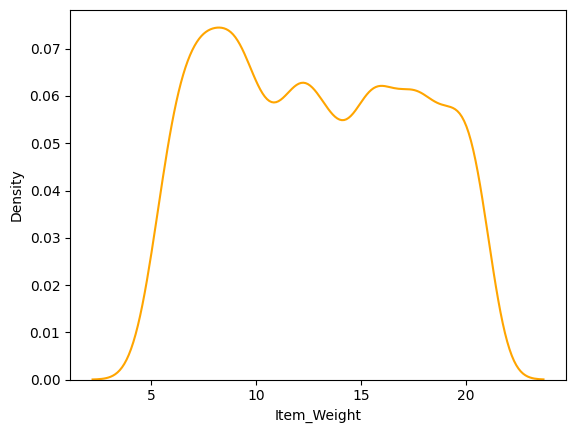

In [14]:
sns.kdeplot(train_data['Item_Weight'], color='orange')

Text(0.5, 1.0, 'Item_Weight Boxplot')

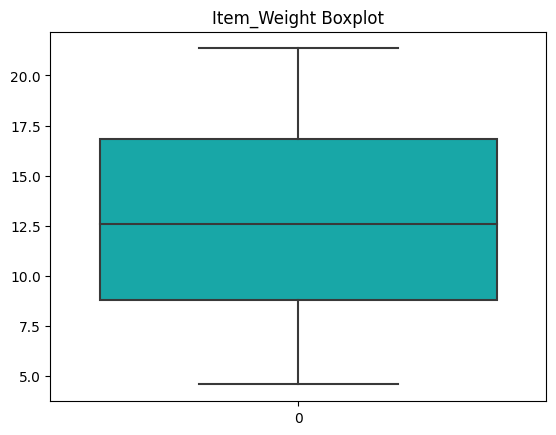

In [15]:
sns.boxplot(data=train_data['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency:

In [16]:
#train
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(
train_data['Item_Weight'].dropna().mean())

#test
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(
test_data['Item_Weight'].dropna().mean())

#checking if we filled missing values
train_data['Item_Weight'].isnull().sum(),test_data['Item_Weight'].isnull().sum()

(0, 0)

### 4/5. Transforming variables

Since *Outlet_Establishment_Year* does not make a sensible variable for fitting a model, we replace this variable with *Years_Since_Establishment*

In [17]:
train_data["Years_Since_Establishment"] = 2013 - train_data["Outlet_Establishment_Year"]
test_data["Years_Since_Establishment"] = 2013 - test_data["Outlet_Establishment_Year"]

### 5/5. Selecting features based on requirements

In [18]:
train_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
test_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [19]:
# train_data.info()

In [20]:
# #    Column                     Non-Null Count  Dtype    Transformation
# ---  ------                     --------------  -----    --------------
#  0   Item_Identifier            8523 non-null   object   removed 1
#  1   Item_Weight                8523 non-null   float64  used 1
#  2   Item_Fat_Content           8523 non-null   object   Label Encoding 1
#  3   Item_Visibility            8523 non-null   float64  used 2
#  4   Item_Type                  8523 non-null   object   Label Encoding 1
#  5   Item_MRP                   8523 non-null   float64  used 3
#  6   Outlet_Identifier          8523 non-null   object   removed 2
#  7   Outlet_Establishment_Year  8523 non-null   int64    converted, used 4
#  8   Outlet_Size                8523 non-null   object   missing value treated, Label Encoding 3
#  9   Outlet_Location_Type       8523 non-null   object   Label Encoding 4
#  10  Outlet_Type                8523 non-null   object   Label Encoding 5
#  11  Item_Outlet_Sales          8523 non-null   float64  Y - predict variable

# Step 2/5: Data Visualization

### 1/2. Numerical Variables

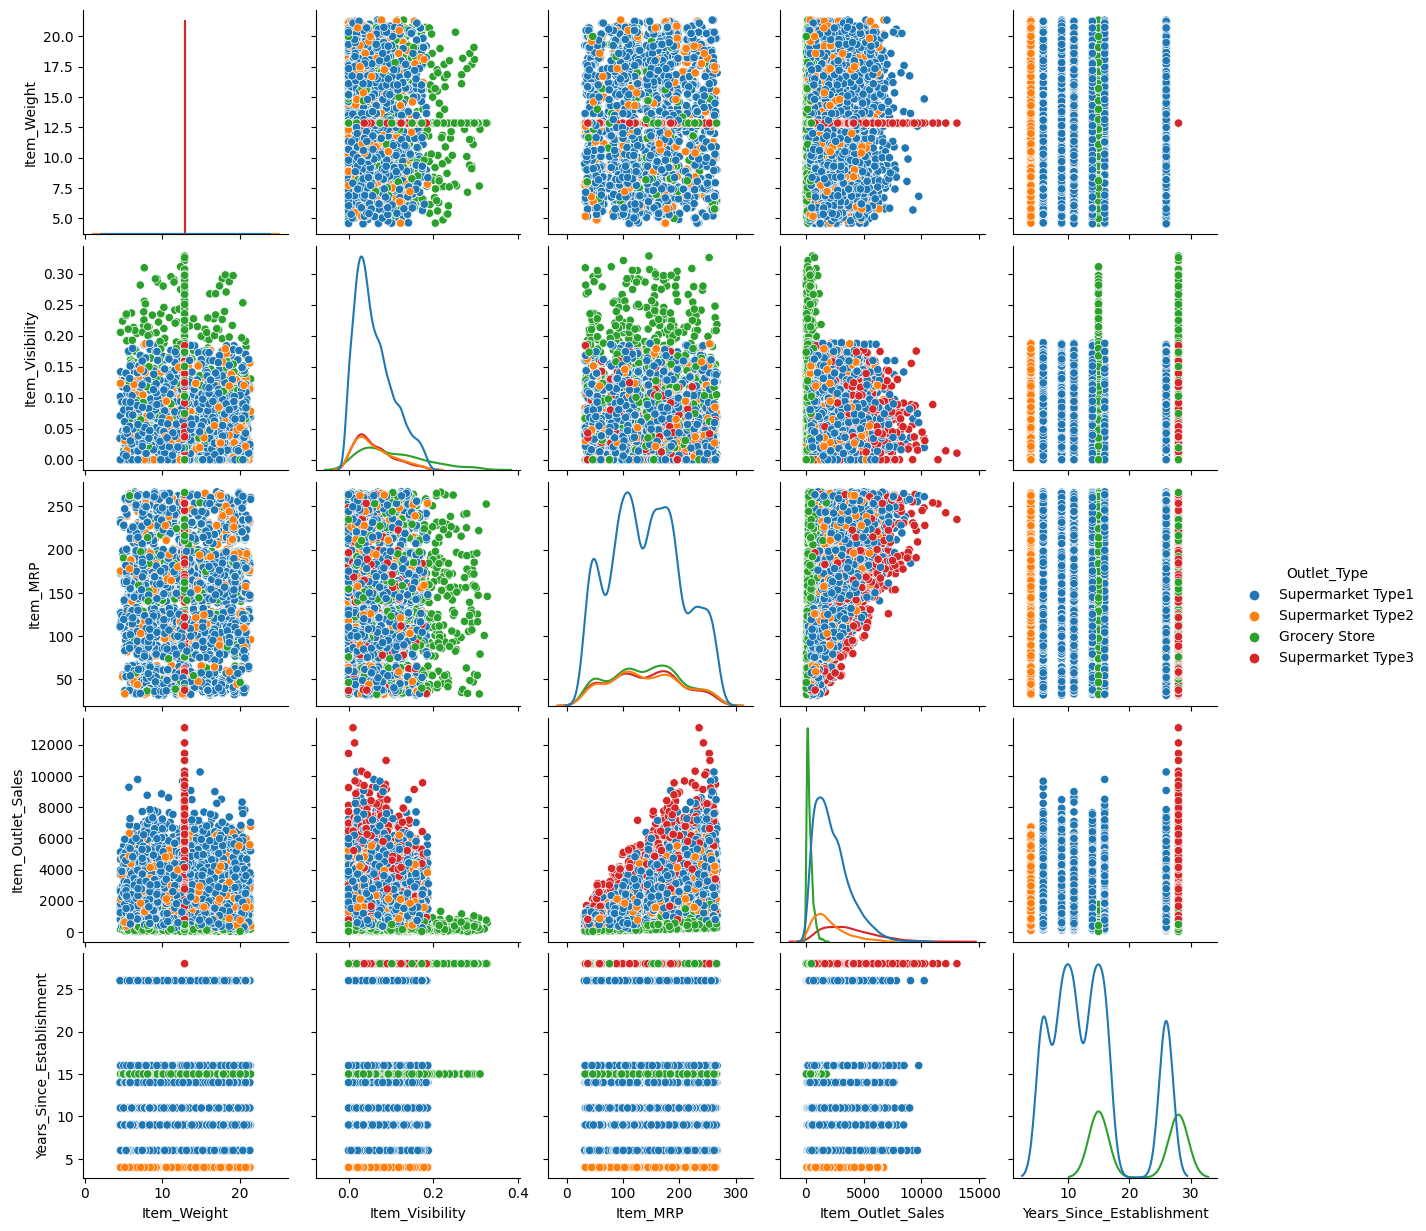

In [21]:
# Item_Weight distribution
_= sns.pairplot(train_data, diag_kind="kde", diag_kws=dict(fill=False), hue = 'Outlet_Type')

### 2/2. Categorical Variables

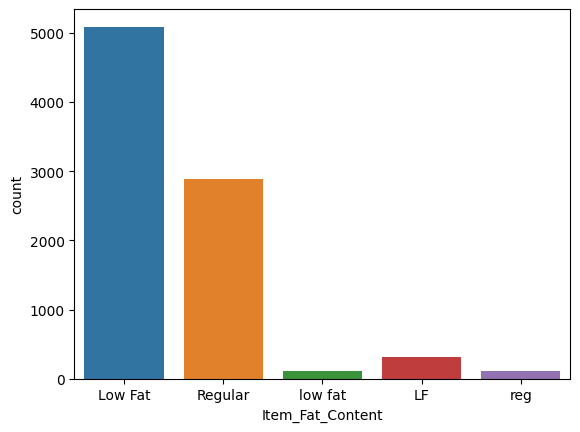

In [22]:
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.show()

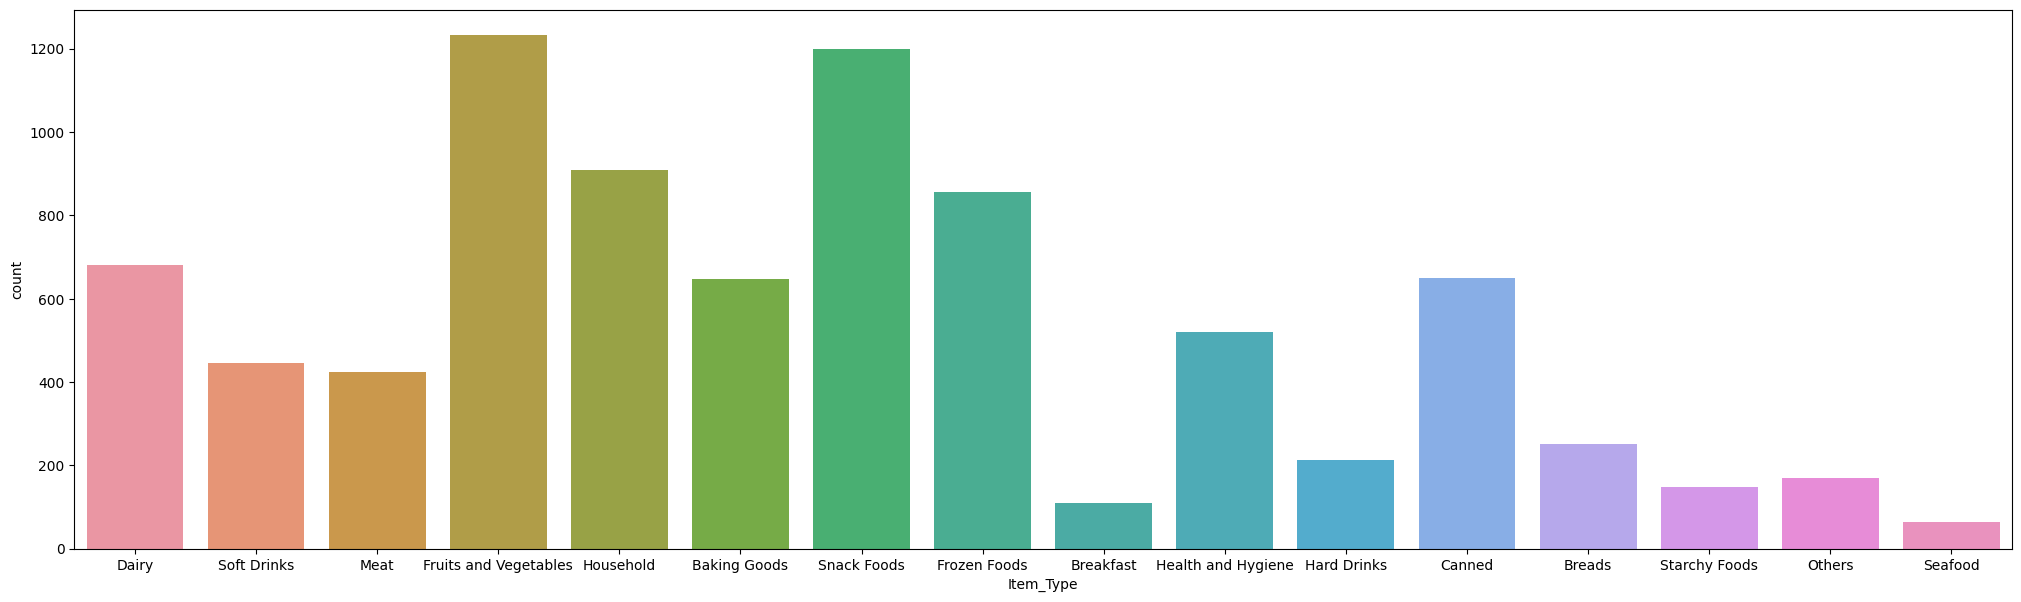

In [23]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=train_data)
plt.show()

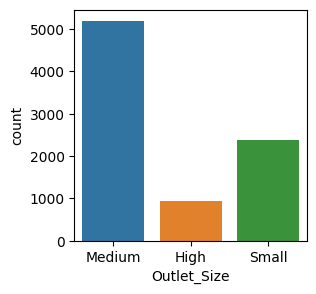

In [24]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Size', data=train_data)
plt.show()

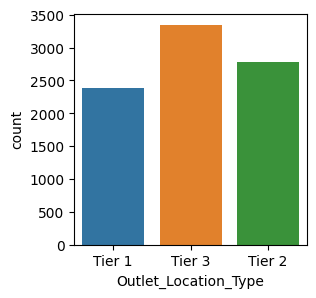

In [25]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type', data=train_data)
plt.show()

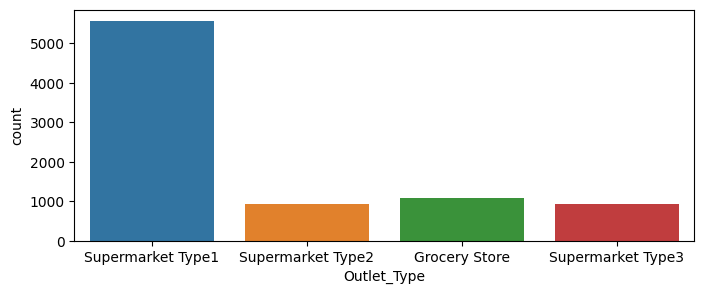

In [26]:
plt.figure(figsize=(8,3))
sns.countplot(x='Outlet_Type', data=train_data)
plt.show()

# Step 3/5 : Data Preprocessing

Preprocessing Task before Model Building : Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train_data['Item_Fat_Content']= le.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type']= le.fit_transform(train_data['Item_Type'])
train_data['Outlet_Size']= le.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']= le.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type']= le.fit_transform(train_data['Outlet_Type'])

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Outlet_Type                8523 non-null   int32  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   Years_Since_Establishment  8523 non-null   int64  
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


### Correlation Matrix

<Axes: >

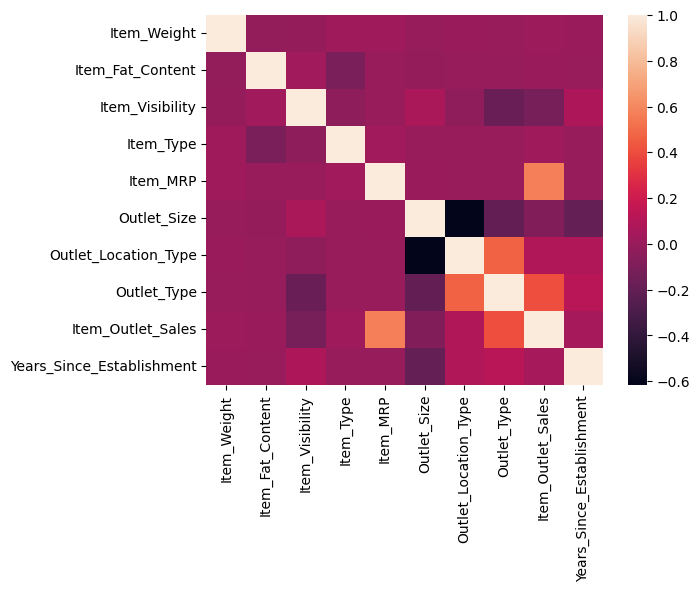

In [29]:
#plotting the correlation matrix
sns.heatmap(train_data.corr() ,cmap='rocket')

Thus we see that *Item_MPR* and *Outlet_Type* has positive correlation with *Item_Outlet_Sales*

# Step 4/5: Model Fitting

### Splitting Train and Validation Data

In [30]:
X=train_data.drop('Item_Outlet_Sales',axis=1)
y=train_data['Item_Outlet_Sales']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state=3, test_size=0.2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


### Model Building

In [33]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
print("R-sq==>",r2_score(Y_test,y_pred))
print("MAE===>",mean_absolute_error(Y_test,y_pred))
print("RMSE==>",np.sqrt(mean_squared_error(Y_test,y_pred)))

R-sq==> 0.5428958547254804
MAE===> 876.469664737044
RMSE==> 1166.6856560162546


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)

In [37]:
print("R-sq==>",r2_score(Y_test,y_pred))
print("MAE===>",mean_absolute_error(Y_test,y_pred))
print("RMSE==>",np.sqrt(mean_squared_error(Y_test,y_pred)))

R-sq==> 0.585666964061228
MAE===> 777.9722099651611
RMSE==> 1110.7621172565498


In [38]:
from xgboost import XGBRegressor

In [39]:
XGB_reg=XGBRegressor()
XGB_reg.fit(X_train, Y_train)
y_pred=XGB_reg.predict(X_test)

In [40]:
print("R-sq==>",r2_score(Y_test,y_pred))
print("MAE===>",mean_absolute_error(Y_test,y_pred))
print("RMSE==>",np.sqrt(mean_squared_error(Y_test,y_pred)))

R-sq==> 0.5666701133714016
MAE===> 803.3501135677648
RMSE==> 1135.9405426591386


### Hyperparameter Tuning

In [67]:
# Define hyperparameters to be tuned
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=hyperparameters,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, Y_train)
best_regressor = grid_search.best_estimator_

# Print the best hyperparameters and performance
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (MSE): ", abs(grid_search.best_score_))

Best Hyperparameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}
Best Score (MSE):  1199478.2457658048


# Step 5/5: Feature Importance

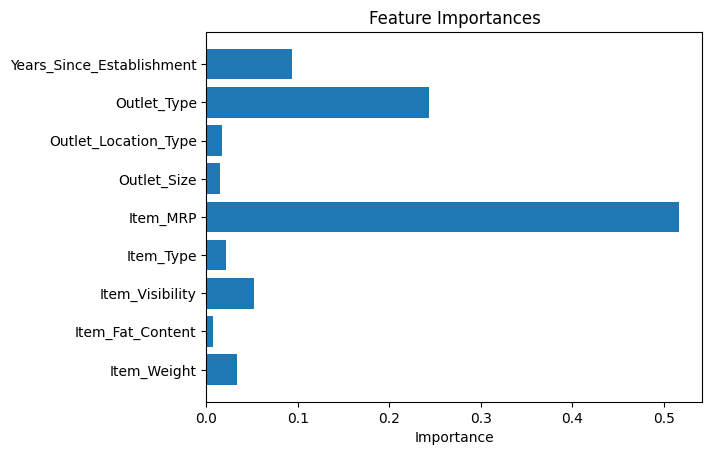

In [68]:
# Get feature importances
feature_importances = best_regressor.feature_importances_

# Plot feature importances
plt.barh(X_train.columns, feature_importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()